### 2 Experiment

b)

In [581]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [582]:
df = pd.read_csv("baseball_data_2005.csv")

In [583]:
df

,First Name,Last Name,Pitcher?,Season AB,AB(4),AB(5),AB(6),AB(7),AB(8),AB(9-10),H(4),H(5),H(6),H(7),H(8),H(9-10)
0,Brent,Abernathy,0,67,0,0,18,1,34,14,0,0,5,0,8,3
1,Bobby,Abreu,0,588,88,96,103,98,100,103,23,38,29,21,32,25
2,Jeremy,Accardo,1,2,0,0,0,0,0,2,0,0,0,0,0,1
3,Jose,Acevedo,1,8,0,0,0,1,6,1,0,0,0,0,1,0
4,Russ,Adams,0,481,55,67,68,79,104,108,12,17,17,26,28,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,Carlos,Zambrano,1,80,14,13,8,14,15,16,5,2,1,4,4,8
925,Victor,Zambrano,1,53,10,8,7,10,12,6,2,2,0,1,2,0
926,Gregg,Zaun,0,434,70,49,78,79,80,78,20,13,20,22,19,15
927,Barry,Zito,1,7,0,3,4,0,0,0,0,0,1,0,0,0


In [584]:
# Exclude irrelevant data from view
df.loc[:, ~df.columns.isin(['AB(4)','AB(5)','AB(6)','AB(7)','AB(8)','AB(9-10)'])]

,First Name,Last Name,Pitcher?,Season AB,H(4),H(5),H(6),H(7),H(8),H(9-10)
0,Brent,Abernathy,0,67,0,0,5,0,8,3
1,Bobby,Abreu,0,588,23,38,29,21,32,25
2,Jeremy,Accardo,1,2,0,0,0,0,0,1
3,Jose,Acevedo,1,8,0,0,0,0,1,0
4,Russ,Adams,0,481,12,17,17,26,28,23
...,...,...,...,...,...,...,...,...,...,...
924,Carlos,Zambrano,1,80,5,2,1,4,4,8
925,Victor,Zambrano,1,53,2,2,0,1,2,0
926,Gregg,Zaun,0,434,20,13,20,22,19,15
927,Barry,Zito,1,7,0,0,1,0,0,0


In [585]:
#Find the ML estimates for the probability parameter θ for each player
df['θ_ML'] = (df['H(4)']+df['H(5)']+df['H(6)']+df['H(7)']+df['H(8)']+df['H(9-10)'])/df['Season AB']

In [586]:
df.loc[:, ~df.columns.isin(['AB(4)','AB(5)','AB(6)','AB(7)','AB(8)','AB(9-10)'])]

,First Name,Last Name,Pitcher?,Season AB,H(4),H(5),H(6),H(7),H(8),H(9-10),θ_ML
0,Brent,Abernathy,0,67,0,0,5,0,8,3,0.238806
1,Bobby,Abreu,0,588,23,38,29,21,32,25,0.285714
2,Jeremy,Accardo,1,2,0,0,0,0,0,1,0.500000
3,Jose,Acevedo,1,8,0,0,0,0,1,0,0.125000
4,Russ,Adams,0,481,12,17,17,26,28,23,0.255717
...,...,...,...,...,...,...,...,...,...,...,...
924,Carlos,Zambrano,1,80,5,2,1,4,4,8,0.300000
925,Victor,Zambrano,1,53,2,2,0,1,2,0,0.132075
926,Gregg,Zaun,0,434,20,13,20,22,19,15,0.251152
927,Barry,Zito,1,7,0,0,1,0,0,0,0.142857


Using *Beta*(100, 300) distribution as the prior distribution for the given Binomial distribution, we have the θ_MAP = (100 - 1 + N_H)/(100 + 300 - 2 + N)

In [587]:
#Find the MAP estimates for the probability parameter θ for each player
df['θ_MAP'] = (df['H(4)'] + df['H(5)'] + df['H(6)'] + df['H(7)'] + df['H(8)'] + df['H(9-10)'] + 99)/(398 + df['Season AB'])

In [588]:
df.loc[:, ~df.columns.isin(['AB(4)','AB(5)','AB(6)','AB(7)','AB(8)','AB(9-10)'])]

,First Name,Last Name,Pitcher?,Season AB,H(4),H(5),H(6),H(7),H(8),H(9-10),θ_ML,θ_MAP
0,Brent,Abernathy,0,67,0,0,5,0,8,3,0.238806,0.247312
1,Bobby,Abreu,0,588,23,38,29,21,32,25,0.285714,0.270791
2,Jeremy,Accardo,1,2,0,0,0,0,0,1,0.500000,0.250000
3,Jose,Acevedo,1,8,0,0,0,0,1,0,0.125000,0.246305
4,Russ,Adams,0,481,12,17,17,26,28,23,0.255717,0.252560
...,...,...,...,...,...,...,...,...,...,...,...,...
924,Carlos,Zambrano,1,80,5,2,1,4,4,8,0.300000,0.257322
925,Victor,Zambrano,1,53,2,2,0,1,2,0,0.132075,0.235033
926,Gregg,Zaun,0,434,20,13,20,22,19,15,0.251152,0.250000
927,Barry,Zito,1,7,0,0,1,0,0,0,0.142857,0.246914


<AxesSubplot:xlabel='Last Name'>

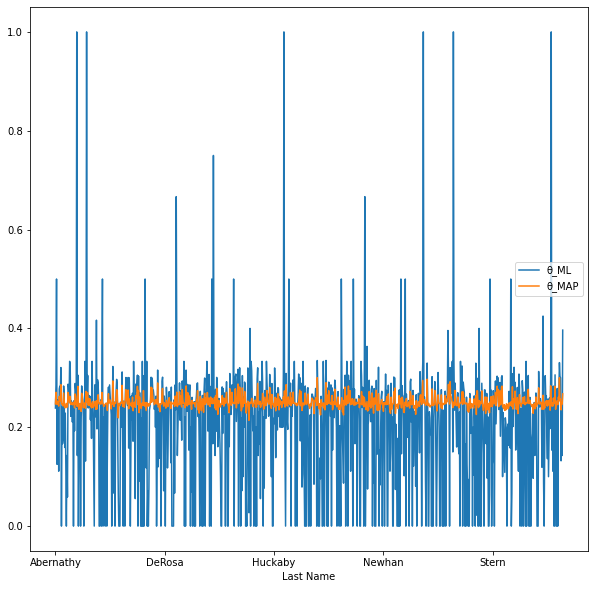

In [589]:
df.plot(x = 'Last Name', y = ['θ_ML', 'θ_MAP'], kind="line", figsize=(10, 10))

We can observe that the graph for ML estimates fluctuates much more dramatically than the graph for MAP estimates. The MAP estimates are therefore much more creditable than then ML estimates.

c)


We first calculate the mean and variance of the ML estimates for all players

In [590]:
ML_means = df['θ_ML'].mean()
ML_variance = df['θ_ML'].var()

In [591]:
ML_means

0.20330708050223253

In [592]:
ML_variance

0.01775582640205193

Then we calculate the parameters for the prior distribution *Beta*(a,b)

In [593]:
y = float(ML_means)
v = float(ML_variance)
a = y * (y * (1-y) / v - 1)
b = (1 - y) * (y * (1 - y) / v - 1)

In [594]:
a

1.6513135008626636

In [595]:
b

6.470949121685449

We than using the new parameters a and b to determine the MAP estimates for all players

In [596]:
df['θ_MAP_new'] = (df['H(4)'] + df['H(5)'] + df['H(6)'] + df['H(7)'] + df['H(8)'] + df['H(9-10)'] + a - 1)/(df['Season AB'] + b + a - 2)

In [597]:
df.loc[:, ~df.columns.isin(['AB(4)','AB(5)','AB(6)','AB(7)','AB(8)','AB(9-10)'])]

,First Name,Last Name,Pitcher?,Season AB,H(4),H(5),H(6),H(7),H(8),H(9-10),θ_ML,θ_MAP,θ_MAP_new
0,Brent,Abernathy,0,67,0,0,5,0,8,3,0.238806,0.247312,0.227719
1,Bobby,Abreu,0,588,23,38,29,21,32,25,0.285714,0.270791,0.283866
2,Jeremy,Accardo,1,2,0,0,0,0,0,1,0.500000,0.250000,0.203307
3,Jose,Acevedo,1,8,0,0,0,0,1,0,0.125000,0.246305,0.116930
4,Russ,Adams,0,481,12,17,17,26,28,23,0.255717,0.252560,0.253840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,Carlos,Zambrano,1,80,5,2,1,4,4,8,0.300000,0.257322,0.286236
925,Victor,Zambrano,1,53,2,2,0,1,2,0,0.132075,0.235033,0.129415
926,Gregg,Zaun,0,434,20,13,20,22,19,15,0.251152,0.250000,0.249138
927,Barry,Zito,1,7,0,0,1,0,0,0,0.142857,0.246914,0.125841


<AxesSubplot:xlabel='Last Name'>

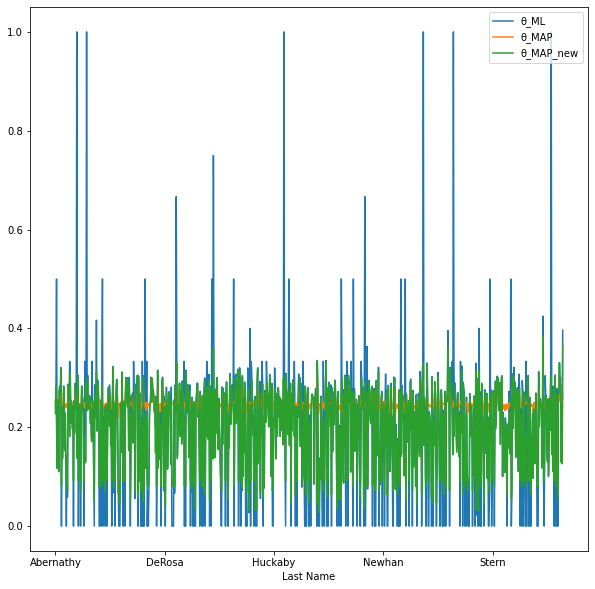

In [598]:
df.plot(x = 'Last Name', y = ['θ_ML', 'θ_MAP', 'θ_MAP_new'], kind="line", figsize=(10, 10))

d)

In [599]:
df1 = df

In [600]:
df1['N_H'] = df['H(4)'] + df['H(5)'] + df['H(6)'] + df['H(7)'] + df['H(8)'] + df['H(9-10)']

In [601]:
df1

,First Name,Last Name,Pitcher?,Season AB,AB(4),AB(5),AB(6),AB(7),AB(8),AB(9-10),H(4),H(5),H(6),H(7),H(8),H(9-10),θ_ML,θ_MAP,θ_MAP_new,N_H
0,Brent,Abernathy,0,67,0,0,18,1,34,14,0,0,5,0,8,3,0.238806,0.247312,0.227719,16
1,Bobby,Abreu,0,588,88,96,103,98,100,103,23,38,29,21,32,25,0.285714,0.270791,0.283866,168
2,Jeremy,Accardo,1,2,0,0,0,0,0,2,0,0,0,0,0,1,0.500000,0.250000,0.203307,1
3,Jose,Acevedo,1,8,0,0,0,1,6,1,0,0,0,0,1,0,0.125000,0.246305,0.116930,1
4,Russ,Adams,0,481,55,67,68,79,104,108,12,17,17,26,28,23,0.255717,0.252560,0.253840,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,Carlos,Zambrano,1,80,14,13,8,14,15,16,5,2,1,4,4,8,0.300000,0.257322,0.286236,24
925,Victor,Zambrano,1,53,10,8,7,10,12,6,2,2,0,1,2,0,0.132075,0.235033,0.129415,7
926,Gregg,Zaun,0,434,70,49,78,79,80,78,20,13,20,22,19,15,0.251152,0.250000,0.249138,109
927,Barry,Zito,1,7,0,3,4,0,0,0,0,0,1,0,0,0,0.142857,0.246914,0.125841,1


In [602]:
def calc_model_evidence(thetas, nh_n, beta_m1, beta_m2):
    # Calculate model evidence for M1
    m1_evidence = 0
    for theta in thetas:
        likelihood = 1
        for player in nh_n:
            nh, n = player
            likelihood *= (theta ** nh) * ((1 - theta) ** (n - nh))
        m1_evidence += likelihood * stats.beta.pdf(theta, beta_m1[0], beta_m1[1])
    m1_evidence = m1_evidence / len(thetas)

    # Calculate model evidence for M2
    m2_evidence = 0
    for theta in thetas:
        likelihood = 1
        for player in nh_n:
            nh, n = player
            likelihood *= (theta ** nh) * ((1 - theta) ** (n - nh))
        m2_evidence += likelihood * stats.beta.pdf(theta, beta_m2[0], beta_m2[1])
    m2_evidence = m2_evidence / len(thetas)

    return m1_evidence, m2_evidence

# Parameters
S = 929 # Number of instances (players) in the dataset
# Number of hits and at bats for each player
nh_n = df1.reset_index()[['N_H', 'Season AB']].values.tolist()


In [603]:
nh_n

[[16, 67],
 [168, 588],
 [1, 2],
 [1, 8],
 [123, 481],
 [19, 78],
 [2, 18],
 [102, 368],
 [15, 53],
 [35, 128],
 [137, 427],
 [0, 2],
 [35, 145],
 [1, 6],
 [6, 34],
 [163, 575],
 [62, 235],
 [7, 44],
 [48, 210],
 [4, 32],
 [0, 1],
 [3, 21],
 [1, 17],
 [149, 519],
 [120, 426],
 [100, 387],
 [1, 3],
 [28, 86],
 [10, 45],
 [40, 158],
 [25, 100],
 [8, 38],
 [10, 40],
 [0, 1],
 [104, 410],
 [16, 83],
 [101, 350],
 [117, 424],
 [54, 224],
 [1, 1],
 [4, 28],
 [183, 599],
 [0, 1],
 [9, 59],
 [1, 7],
 [138, 557],
 [0, 3],
 [63, 300],
 [152, 536],
 [155, 582],
 [154, 603],
 [44, 199],
 [0, 1],
 [9, 49],
 [1, 3],
 [5, 38],
 [137, 468],
 [1, 1],
 [164, 608],
 [75, 246],
 [65, 272],
 [156, 590],
 [126, 523],
 [170, 647],
 [17, 79],
 [39, 161],
 [11, 62],
 [1, 3],
 [64, 249],
 [73, 319],
 [2, 19],
 [0, 6],
 [12, 42],
 [124, 511],
 [72, 326],
 [5, 12],
 [23, 117],
 [8, 27],
 [82, 283],
 [52, 202],
 [0, 2],
 [0, 1],
 [1, 7],
 [119, 466],
 [0, 2],
 [156, 545],
 [1, 2],
 [0, 1],
 [24, 109],
 [2, 19],
 [

In [604]:

beta_m1 = (100, 300) # Beta distribution for M1
beta_m2 = (1.6513135008626636, 6.470949121685449) # Beta distribution for M2
num_samples = 1000 # Number of theta samples to generate

# Generate theta samples
thetas = np.random.beta(1, 1, num_samples)

# Calculate model evidence for M1 and M2
m1_evidence, m2_evidence = calc_model_evidence(thetas, nh_n, beta_m1, beta_m2)


In [605]:
# Determine which model to choose
if (m1_evidence > m2_evidence or m1_evidence == m2_evidence):
    print("Choose Beta(100, 300)")
else:
    print("Choose Beta(1.6513135008626636, 6.470949121685449)")

Choose Beta(100, 300)
